Importing File from Local PC

In [4]:
from google.colab import files

Uploading the file

In [5]:
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


Loading the dataset

In [6]:
import pandas as pd

loan = pd.read_csv('bank-additional-full.csv', sep = ';')

print(loan.info())
print(loan.head(10))
print(loan.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Performing Basic Exploratory data Analysis on Age, job and Marital Status**

*1. Age*

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


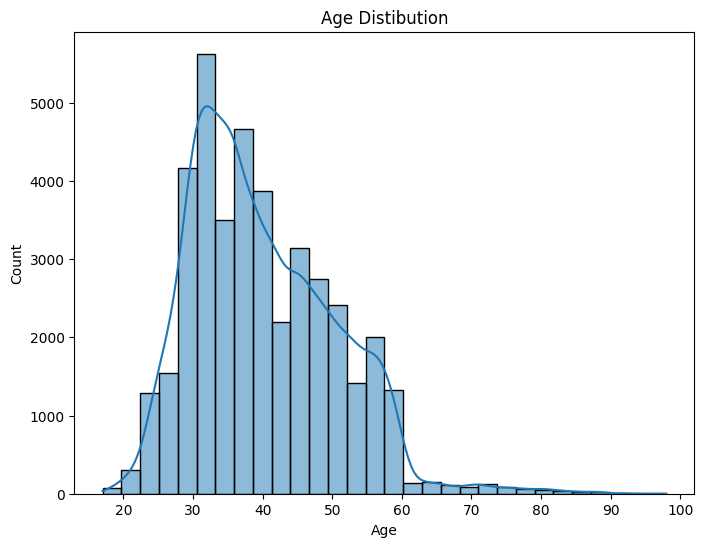

In [7]:
print(loan['age'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 6))
sns.histplot(loan['age'], bins = 30, kde = True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distibution')
plt.show()

*2. Job*

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


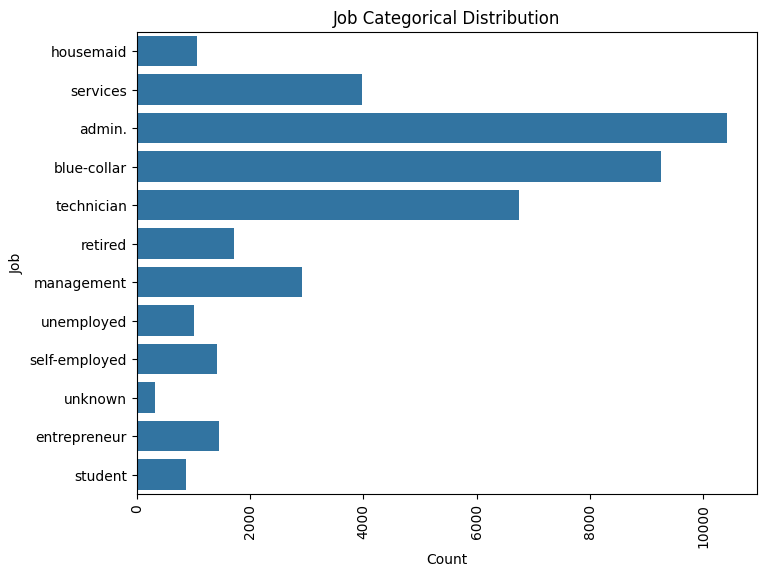

In [8]:
print(loan['job'].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(loan['job'])
plt.xlabel('Count')
plt.ylabel('Job')
plt.title('Job Categorical Distribution')
plt.xticks(rotation=90)
plt.show()

*3. Marital Status*

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


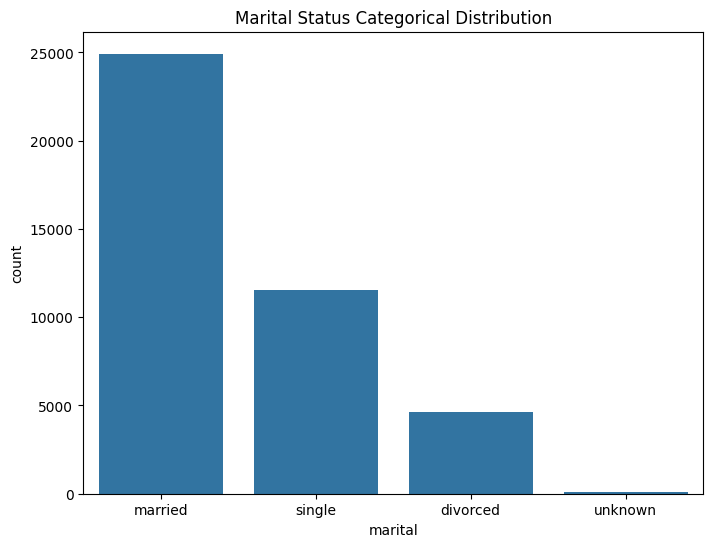

In [9]:
print(loan['marital'].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(x = loan['marital'])
plt.title('Marital Status Categorical Distribution')
plt.show()

**Taining a Logostic Regression Classifier**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

x = loan.drop('y', axis = 1)
y = loan['y']

Encoding Categorical data

In [11]:
categories = loan.drop('y', axis = 1)
encoded_categories = pd.get_dummies(categories, drop_first = True)
print(encoded_categories.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

Dividing data into train and test data

In [12]:
X_train, x_test, Y_train, y_test = train_test_split(encoded_categories, y, test_size = 0.2, random_state = 0)

Feeding the training data to model

In [13]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Analyzing the Acceptance rate**

shows the percentage of customers who accpeted the offer

In [14]:
print(loan['y'].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


Comapring the acceptance rates group by features

*1. Job Wise*

In [15]:
job_acceptance = loan.groupby('job')['y'].value_counts().unstack()
print(job_acceptance)

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


*2. Education Wise*

In [16]:
education_acceptance = loan.groupby('education')['y'].value_counts().unstack()
print(education_acceptance)

y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


*3. Age wise*

In [17]:
loan['age_group'] = pd.cut(loan['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18–30', '31–40', '41–50', '51–60', '60+'])
age_acceptance = loan.groupby('age_group')['y'].value_counts(normalize=True).unstack()
print(age_acceptance)

y                no       yes
age_group                    
18–30      0.848980  0.151020
31–40      0.902533  0.097467
41–50      0.918262  0.081738
51–60      0.893461  0.106539
60+        0.545055  0.454945


/tmp/ipython-input-17-3664726290.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_acceptance = loan.groupby('age_group')['y'].value_counts(normalize=True).unstack()


*4. Marital Wise*

In [18]:
marital_acceptance = loan.groupby('marital')['y'].value_counts().unstack()
print(marital_acceptance)

y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


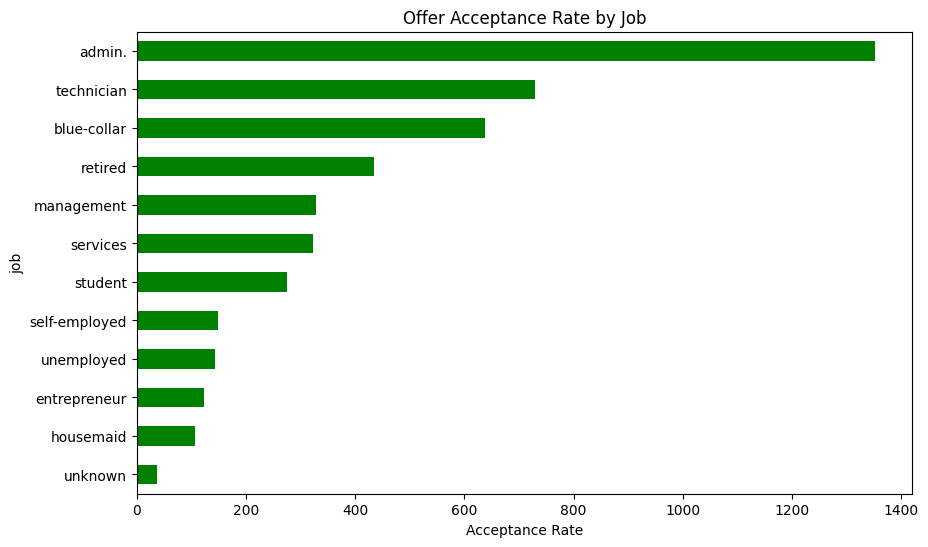

In [22]:
plt.figure(figsize=(10, 6))
job_acceptance['yes'].sort_values().plot(kind='barh', color='green')
plt.xlabel('Acceptance Rate')
plt.title('Offer Acceptance Rate by Job')
plt.show()

**Problem Statement**

Predict which customers are likely to accept a personal loan offer

**Data Understanding and Description**

This dataset was of Personal loan acceptance prediction, the status if the loan was accepted or not and so many other factors are included in this dataset which altogether.

**Data Cleaning and Preparation**

This dataset is already clean and analysis ready.

**Exploratory Data Analysis (EDA) with graphs**

The EDA of the major aspects of the dataset are represented with their basic EDA info by using describe() and their count with, categorically if needed, appropriate charts.

**Model Training and Testing**

In this task unlike other tasks, was asked to train a Logistic Regression model.
I encoded the non-nunmerical categorical data and then fed 80% of that to the model to train it and remaining 20% was spared to test loan acceptance.

**Conlusion**

This task was about to grasp basic EDA and learn what Logistic Regression model is.